In [1]:
import tabint
from tabint.utils import *
from tabint.dataset import *
from tabint.feature import *
from tabint.pre_processing import *
from tabint.visual import *
from tabint.learner import *
from tabint.interpretation import *
from tabint.inference import *

/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from tabint.model_performance import *

In [3]:
data = pd.read_csv('DLCO.csv', sep=";")

In [4]:
data.head()

,Sex,Age,Height,DLCO
0,F,20,173.0,29.2
1,F,22,165.0,26.3
2,F,22,168.6,27.9
3,F,23,164.0,25.4
4,F,24,170.0,29.3


In [5]:
df, y, pp_outp = tabular_proc(data, 'DLCO', [fill_na(), app_cat(), dummies()])

In [6]:
df.head()

,Age,Height,Sex_F,Sex_M,Sex_nan
0,20,173.0,1,0,0
1,22,165.0,1,0,0
2,22,168.6,1,0,0
3,23,164.0,1,0,0
4,24,170.0,1,0,0


In [7]:
pp_outp['cons']

['Age', 'Height']

# dataset

In [8]:
ds = TBDataset.from_SKSplit(df, y=y, cons=pp_outp['cons'])

In [9]:
ds.n_trn

509

# learner

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
learner = SKLearner(LinearRegression())

In [12]:
learner.fit(*ds.trn, *ds.val)

trn score:  0.6441468016446625
val score:  0.3882350458409377


# plot

In [13]:
avp = actual_vs_predict.from_learner(learner, ds)

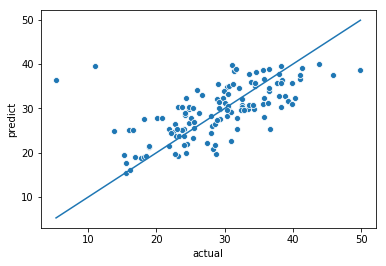

In [14]:
avp.plot()

In [15]:
import seaborn as sns

In [16]:
def plot_line(x_series, y_series, labels = None, fmts = None, xlabel = None, xlim = None, ylim = None, **kwargs):
    length = len(to_iter(x_series))
    if fmts is None: fmts = [None]*length
    if labels is None: labels_ = [None]*length
    for x_serie, y_serie, label, fmt in zip(to_iter(x_series),to_iter(y_series),to_iter(labels_), to_iter(fmts)):
        params = [x_serie, y_serie]
        if fmt is not None: params.append(fmt)
        if label is not None: params.append(label)
        plt.plot(*params, **kwargs)
    if xlabel is not None: plt.xlabel(xlabel)
    if ylim is not None: plt.ylim(ylim)
    if xlim is not None: plt.xlim(xlim)

In [17]:
def plot_bisectrix(start = 0, stop = 10, num = 20, **kargs):
    obs = np.linspace(start = start, stop = stop, num = num)
    plot_line(obs, obs, **kargs)

In [18]:
def plot_scatter(x, y, xlabel=None, ylabel=None, title = None, hue=None, **kargs): 
    sns.scatterplot(pred,ds.y_val, hue=hue, **kargs)
    if xlabel is not None: plt.xlabel(xlabel)
    if ylabel is not None: plt.ylabel(ylabel)
    if title is not None: plt.title(title)

In [19]:
class actual_vs_predicted:
    def __init__(self, actual, predict, df, data):
        self.actual, self.predict = actual, predict
        self.df, self.data = df, data
        
    @classmethod
    def from_learner(cls, learner, ds):
        actual = ds.y_val
        predict = learner.predict(ds.x_val)
        data = cls.calculate(actual, predict)
        return cls(actual, predict, ds.x_val, data)
    
    @classmethod
    def from_
    
    @staticmethod
    def calculate(actual, predict):
        data = pd.DataFrame({'actual':actual, 'predict':predict, 'mse': (actual-predict)**2})
        return ResultDF(data, 'mse')
    
    def plot(self, hue = None, num = 100, **kagrs):
        if hue is not None: hue = self.df[hue]
        concat = np.concatenate([self.actual, self.predict])
        plot_scatter(self.actual, self.predict, xlabel='actual', ylabel='predict', hue=hue)
        plot_bisectrix(np.min(concat), np.max(concat), num)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

SyntaxError: invalid syntax (<ipython-input-19-362afbc6a69a>, line 14)

In [20]:
avp = actual_vs_predict.from_learner(learner, ds)

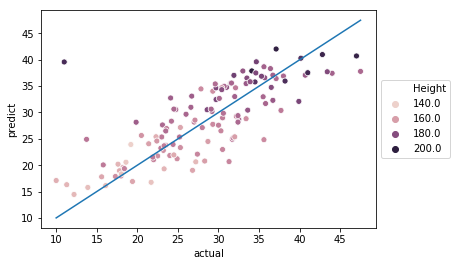

In [21]:
avp.plot(hue = 'Height')

In [16]:
class model_performace:
    def __init__(self, data, **kagrs): 
        self.data = data
    
    @classmethod
    def from_learner(cls, learner, ds, **kargs):
        y_true = ds.y_val
        y_pred = learner.predict(ds.x_val)
        return y_true, y_pred

    @classmethod
    def from_df(cls, **kagrs): pass

    @classmethod
    def from_series(cls, y_true, y_pred, **kargs):
        return cls.calculate(y_true, y_pred, **kargs)

    @staticmethod
    def calculate(y_true, y_pred, **kargs): pass

    def plot(self, **kagrs): pass

In [23]:
class actual_vs_predict(model_performace):
    def __init__(self, data, y_true, y_pred, df):
        super().__init__(data)
        self.df, self.y_true, self.y_pred = df, y_true, y_pred
        
    @classmethod
    def from_learner(cls, learner, ds):
        y_true, y_pred = model_performace.from_learner(learner, ds)
        return cls.from_series(y_true, y_pred, ds.x_val)

    @classmethod
    def from_series(cls, y_true, y_pred, df):
        data = model_performace.from_series(y_true, y_pred)
        return cls(data, y_true, y_pred, df)
    
    @staticmethod
    def calculate(actual, predict):
        data = pd.DataFrame({'actual':actual, 'predict':predict, 'mse': (actual-predict)**2})
        return ResultDF(data, 'mse')
    
    def plot(self, hue = None, num = 100, **kagrs):
        if hue is not None: hue = self.df[hue]
        concat = np.concatenate([self.y_true, self.y_pred])
        plot_scatter(self.y_true, self.y_pred, xlabel='actual', ylabel='predict', hue=hue)
        plot_bisectrix(np.min(concat), np.max(concat), num)
        if hue is not None: plot_legend()

In [24]:
avp = actual_vs_predict.from_learner(learner, ds)

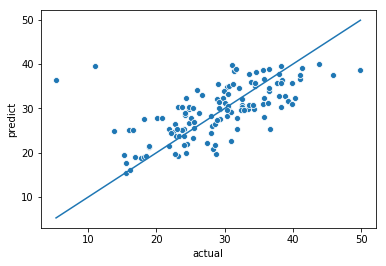

In [25]:
avp.plot()